<a href="https://colab.research.google.com/github/DayeonKim517/boostcourse_Data_Science_Projects-2024/blob/main/Week2_mission_LUKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [ ]:
# 폰트 설정

!pip install koreanize-matplotlib

import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.6 MB/s eta 0:00:00


# 📌 Q1
전국 시도별 약국수를 구해주세요!

상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요.  
이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다.
* 각자 구하기 편한 방법을 통해 빈도수를 구합니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [ ]:
# 시도별 약국수 구하기

df_drug = df[df["상권업종소분류명"] == "약국"]
df_city_drug = df_drug["시도명"].value_counts()
df_city_drug

,count
시도명,
경기도,4510
서울특별시,3579
부산광역시,1130
경상남도,1017
인천광역시,1002
경상북도,915
대구광역시,870
전라북도,862
충청남도,830


<Axes: xlabel='시도명', ylabel='count'>

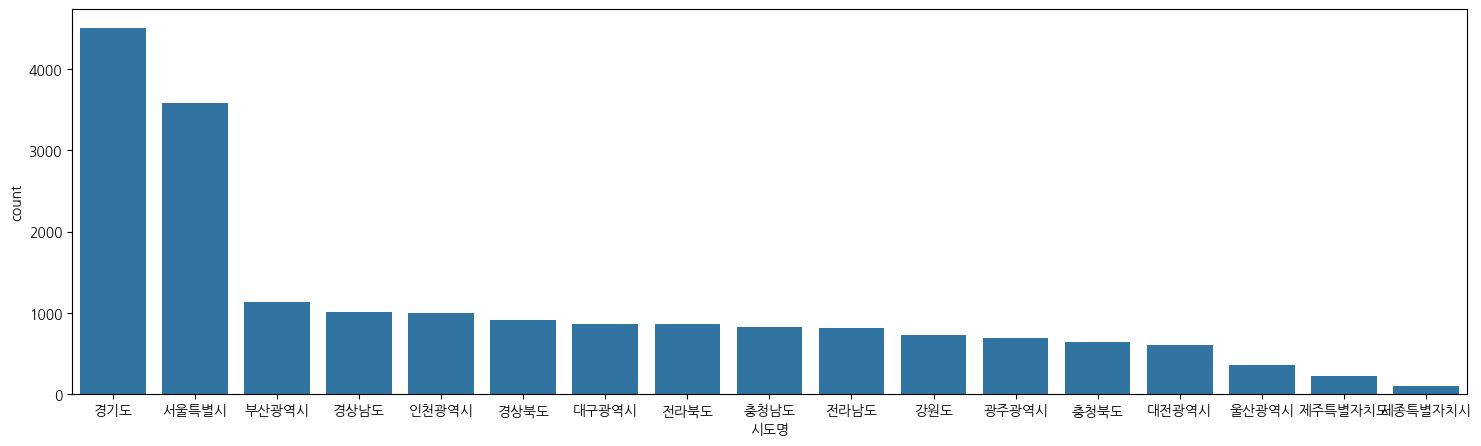

In [ ]:
# 시각화

plt.figure(figsize=(18, 5))
sns.countplot(data=df_drug, x="시도명", order = df_drug["시도명"].value_counts().index)

# 📌 Q2
여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다.  
병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다.  
그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

* 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!

In [ ]:
df["상권업종소분류명"].value_counts()

,count
상권업종소분류명,
약국,18964
치과의원,13731
한의원,13211
내과/외과,11374
기타병원,4922
일반병원,3385
동물병원,3098
정형/성형외과,2562
소아과,2472


In [ ]:
# 시도별 동물병원 수

df_animal = df[df["상권업종소분류명"] == "동물병원"]
df_city_animal = df_animal["시도명"].value_counts()
df_city_animal

,count
시도명,
경기도,992
서울특별시,557
인천광역시,193
경상북도,165
경상남도,161
부산광역시,153
충청남도,131
대구광역시,119
전라북도,111


<Axes: xlabel='시도명', ylabel='count'>

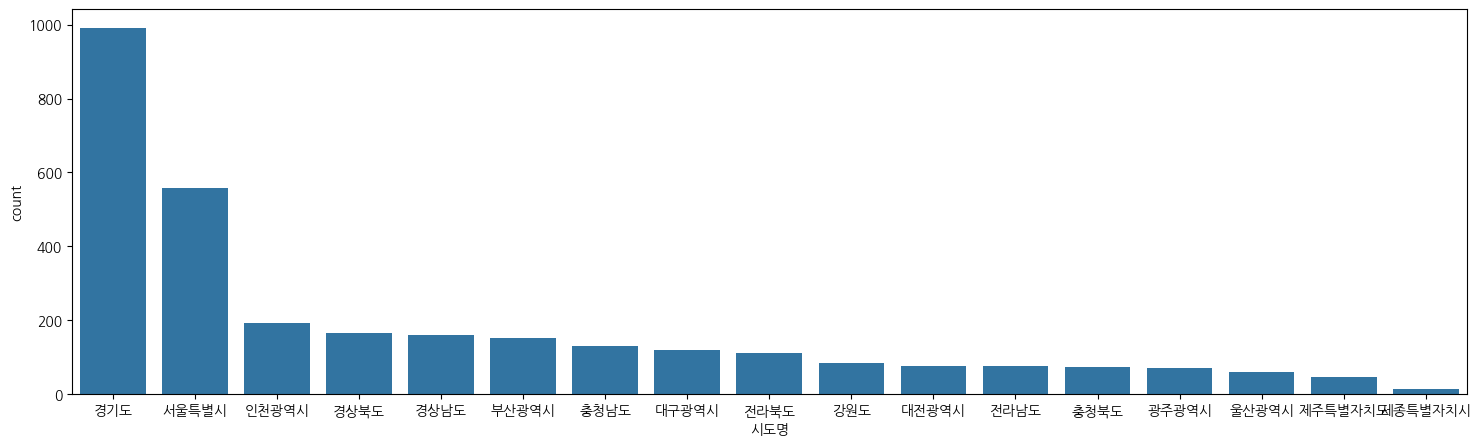

In [ ]:
# 시각화

plt.figure(figsize=(18, 5))
sns.countplot(data=df_animal, x="시도명", order = df_animal["시도명"].value_counts().index)

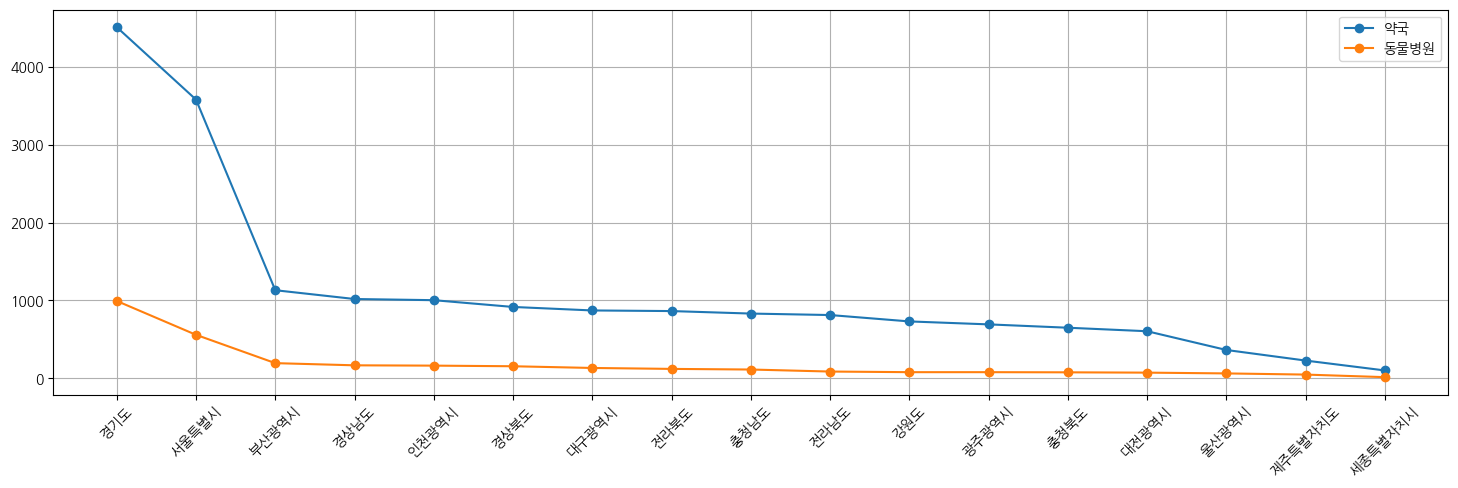

In [ ]:
# 시도별 약국과 동물병원 추세 비교

plt.figure(figsize=(18, 5))
plt.plot(df_city_drug.index, df_city_drug, label="약국", marker='o')
plt.plot(df_city_drug.index, df_city_animal, label="동물병원", marker='o')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

# 📌Q3
강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다.  
실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

* 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
* 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
* 비율이 높은 순서대로 정렬되게 구해주세요!
* 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
* 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/데이터분석/네이버 부스트코스/2주차/2주차_data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape

(91335, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [ ]:
df["상권업종소분류명"].value_counts()

,count
상권업종소분류명,
약국,18964
치과의원,13731
한의원,13211
내과/외과,11374
기타병원,4922
일반병원,3385
동물병원,3098
정형/성형외과,2562
소아과,2472


In [ ]:
# 서울시 구별 피부/성형외과 수

df_seoul_beauty = df[((df["상권업종소분류명"].str.contains("피부")) | (df["상권업종소분류명"].str.contains("성형"))) & (df["시도명"]== "서울특별시")]
beauty_count = df_seoul_beauty["시군구명"].value_counts()
beauty_count

,count
시군구명,
강남구,603
서초구,200
송파구,48
마포구,40
영등포구,39
강서구,38
광진구,37
강동구,37
중구,31


In [ ]:
df["상권업종중분류명"].value_counts()

,count
상권업종중분류명,
병원,60774
약국/한약방,20923
수의업,5323
유사의료업,3774
의료관련서비스업,541


In [ ]:
# 서울시 구별 전체병원 수

df_seoul_hospital = df[(df["상권업종중분류명"] == "병원") & (df["시도명"]== "서울특별시")]
hospital_count = df_seoul_hospital["시군구명"].value_counts()
hospital_count

,count
시군구명,
강남구,2550
서초구,1196
송파구,748
동대문구,644
광진구,600
강서구,579
영등포구,516
은평구,506
노원구,503


In [ ]:
# 서울시 구별 전체병원에 대한 피부/성형외과 비율

result = (beauty_count / hospital_count).sort_values(ascending=False).round(2)
result

,count
시군구명,
강남구,0.24
서초구,0.17
마포구,0.09
서대문구,0.08
영등포구,0.08
강동구,0.07
중구,0.07
중랑구,0.07
강서구,0.07


# 📌Q4
평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다.  
여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다.  
지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.
* folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
* 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
* folium 문서 : https://python-visualization.github.io/folium/quickstart.html



In [ ]:
import folium
from folium.plugins import MiniMap

In [ ]:
# 노인/치매병원 데이터 추출

geo_df = df[df["상권업종소분류명"] == "노인/치매병원"]

In [ ]:
# 지도의 중간값 지정

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=7)

# 마커 설정

for n in geo_df.index:
    name = geo_df.loc[n, '상호명']
    address = geo_df.loc[n, '도로명주소']
    popup_content = f"<b>{name}</b> - {address}" # 팝업 내용을 가로로 구성
    location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']]

    folium.Marker(
        location=location,
        popup=folium.Popup(popup_content, max_width=300),  # 팝업 설정
        tooltip=popup_content,  # 마커에 마우스를 올렸을 때 나타나는 정보
        icon=folium.Icon(color='lightred', icon='info-sign') # 마커를 핑크색으로
    ).add_to(map)

# 미니맵 추가
minimap = MiniMap()
map.add_child(minimap)

map